In [1]:
import random
import math

def heuristic(pod, pom):
    return (1 + pod) * (1 + pom)

def get_neighbors(x, y, grid, blocked_cells, visited):
    neighbors = []
    if x > 0 and (x - 1, y) not in blocked_cells and (x - 1, y) not in visited:
        neighbors.append((x - 1, y))
    if x < len(grid) - 1 and (x + 1, y) not in blocked_cells and (x + 1, y) not in visited:
        neighbors.append((x + 1, y))
    if y > 0 and (x, y - 1) not in blocked_cells and (x, y - 1) not in visited:
        neighbors.append((x, y - 1))
    if y < len(grid[0]) - 1 and (x, y + 1) not in blocked_cells and (x, y + 1) not in visited:
        neighbors.append((x, y + 1))
    return neighbors

def random_restart_hill_climbing(grid, start_points, destination, blocked_cells,num_restarts=100, max_iterations=100):
    best_path = []
    best_cost = float('inf')
    all_paths = []  # To store all possible paths explored
    

    for _ in range(num_restarts):
        current_x, current_y = random.choice(start_points)
        path = [(current_x, current_y)]
        current_cost = 0.0
        iterations = 0
        visited = set()
        visited.add((current_x, current_y))

        while (current_x, current_y) != destination and iterations < max_iterations:
            neighbors = get_neighbors(current_x, current_y, grid, blocked_cells, visited)

            # Check if there are any valid neighbors available
            if not neighbors:
                break

            next_x, next_y = random.choice(neighbors)
            neighbor_cost = heuristic(grid[next_x][next_y][0], grid[next_x][next_y][1])
            cost_diff = neighbor_cost - current_cost

            if cost_diff < 0:
                current_x, current_y = next_x, next_y
                current_cost = neighbor_cost
                path.append((current_x, current_y))
                visited.add((current_x, current_y))

            iterations += 1
        #print(path)
        all_paths.append((path, current_cost))
        if (current_x, current_y) == destination and current_cost < best_cost:
            best_cost = current_cost
            best_path = path
        
        #print("Restart:", _ + 1, "Iterations:", iterations, "Best Cost:", best_cost)

    return all_paths, best_path, best_cost

# Example grid representation with PoD and PoM values
# ... (rest of the code remains unchanged)
# Example grid representation with PoD and PoM values
# ... (rest of the code remains unchanged)
# Example grid representation with PoD and PoM values
grid = [
    [(0.2, 0.9), (0.8, 1), (0.05, 0.05), (0.8, 0.9), (0.8, 0.9), (0, 0), (1, 1), (0.05, 0.05), (0.2, 0.1), (0, 0)],
    [(0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.8, 0.9), (0.8, 0.9),(0.05, 0.05), (0.05, 0.05), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.2, 0.1), (0, 0), (0, 0), (0, 0), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.2, 0.1), (0.3, 0.9), (0.2, 0.1), (0.2, 0.1), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.3, 0.9), (0.2, 0.1), (0.2, 0.1), (0.2, 0.9), (0.2, 0.9), (0.2, 0.1)],
    [(0.2, 0.9), (0.2, 1), (0.2, 0.1), (0.3, 0.9), (0.3, 0.9), (0.2, 0.1), (0, 0), (0, 0), (0, 0), (0.05, 0.05)],
    [(0.2, 0), (0.2, 0.1), (0.2, 0.1), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0, 0)]
]

# Example starting points and destination
blocked_cells = [(0, 5),(0, 9), 
                 (1, 0), (1, 3),
                 (2,1),(2,3),(2,5),(2,6),(2,7),
                 (3,1),(3,3),
                 (4,1),(4,3),
                 (5,6),(5,7),(5,8),
                 (6,6),
                 (7,6),
                 (8,5),(8,8),
                 (9, 3), (9, 4), (9, 5),(9, 8),(9, 9)]
start_points = [(7, 0), (8, 0), (9, 0), (9, 1), (9, 2)]
destination = (0, 6)
max_iterations = 100

# Find the optimal path and cost using the Random Restart Hill Climbing algorithm
all_possible_paths,optimal_path, optimal_cost = random_restart_hill_climbing(grid, start_points, destination, blocked_cells, max_iterations)

# Print the optimal path sequence with costs
print("Optimal Path:")
for x, y in optimal_path:
    print(f"({x}, {y}) -> ", end="")
print("\nOptimal Cost:", optimal_cost)

# Print all possible paths
print("All Possible Paths:")
for idx, (path, cost) in enumerate(all_possible_paths, 1):
    print(f"Path {idx}:")
    for x, y in path:
        print(f"({x}, {y}) -> ", end="")
    print("Cost:", cost)


Optimal Path:

Optimal Cost: inf
All Possible Paths:
Path 1:
(8, 0) -> Cost: 0.0
Path 2:
(9, 2) -> Cost: 0.0
Path 3:
(7, 0) -> Cost: 0.0
Path 4:
(9, 0) -> Cost: 0.0
Path 5:
(7, 0) -> Cost: 0.0
Path 6:
(7, 0) -> Cost: 0.0
Path 7:
(9, 1) -> Cost: 0.0
Path 8:
(9, 0) -> Cost: 0.0
Path 9:
(9, 1) -> Cost: 0.0
Path 10:
(8, 0) -> Cost: 0.0
Path 11:
(9, 1) -> Cost: 0.0
Path 12:
(7, 0) -> Cost: 0.0
Path 13:
(9, 0) -> Cost: 0.0
Path 14:
(9, 1) -> Cost: 0.0
Path 15:
(9, 2) -> Cost: 0.0
Path 16:
(9, 2) -> Cost: 0.0
Path 17:
(7, 0) -> Cost: 0.0
Path 18:
(9, 1) -> Cost: 0.0
Path 19:
(8, 0) -> Cost: 0.0
Path 20:
(9, 2) -> Cost: 0.0
Path 21:
(9, 2) -> Cost: 0.0
Path 22:
(9, 1) -> Cost: 0.0
Path 23:
(7, 0) -> Cost: 0.0
Path 24:
(9, 1) -> Cost: 0.0
Path 25:
(9, 1) -> Cost: 0.0
Path 26:
(9, 2) -> Cost: 0.0
Path 27:
(9, 1) -> Cost: 0.0
Path 28:
(7, 0) -> Cost: 0.0
Path 29:
(9, 2) -> Cost: 0.0
Path 30:
(9, 1) -> Cost: 0.0
Path 31:
(7, 0) -> Cost: 0.0
Path 32:
(8, 0) -> Cost: 0.0
Path 33:
(7, 0) -> Cost: 0.0

In [2]:
# Define different values to test for each hyperparameter
num_restarts_values = [10,20,50, 100, 200,500]
max_iterations_values = [50, 100, 200,500]
iteration=1
# Perform sensitivity analysis for num_restarts
for num_restarts in num_restarts_values:
    for max_iterations in max_iterations_values:
                all_possible_paths,optimal_path, optimal_cost = random_restart_hill_climbing(grid, start_points, destination, blocked_cells, max_iterations)
                print("****************Iteration",iteration)
                print(f"num_restarts={num_restarts} - Optimal Cost: {optimal_cost}")
                print(f"max_iterations={max_iterations} - Optimal Cost: {optimal_cost}")
                iteration = iteration +1

****************Iteration 1
num_restarts=10 - Optimal Cost: inf
max_iterations=50 - Optimal Cost: inf
****************Iteration 2
num_restarts=10 - Optimal Cost: inf
max_iterations=100 - Optimal Cost: inf
****************Iteration 3
num_restarts=10 - Optimal Cost: inf
max_iterations=200 - Optimal Cost: inf
****************Iteration 4
num_restarts=10 - Optimal Cost: inf
max_iterations=500 - Optimal Cost: inf
****************Iteration 5
num_restarts=20 - Optimal Cost: inf
max_iterations=50 - Optimal Cost: inf
****************Iteration 6
num_restarts=20 - Optimal Cost: inf
max_iterations=100 - Optimal Cost: inf
****************Iteration 7
num_restarts=20 - Optimal Cost: inf
max_iterations=200 - Optimal Cost: inf
****************Iteration 8
num_restarts=20 - Optimal Cost: inf
max_iterations=500 - Optimal Cost: inf
****************Iteration 9
num_restarts=50 - Optimal Cost: inf
max_iterations=50 - Optimal Cost: inf
****************Iteration 10
num_restarts=50 - Optimal Cost: inf
max_iterati

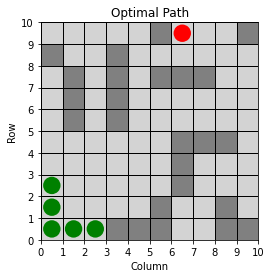

In [3]:
import matplotlib.pyplot as plt

def plot_grid(grid, blocked_cells, start_points, destination, optimal_path):
    rows = len(grid)
    cols = len(grid[0])

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()

    # Plot the grid cells and mark blocked cells
    for r in range(rows):
        for c in range(cols):
            if (r, c) in blocked_cells:
                ax.add_patch(plt.Rectangle((c, rows - 1 - r), 1, 1, facecolor='gray'))
            else:
                ax.add_patch(plt.Rectangle((c, rows - 1 - r), 1, 1, facecolor='lightgray'))

    # Mark the start points and the destination
    for point in start_points:
        ax.add_patch(plt.Circle((point[1] + 0.5, rows - 1 - point[0] + 0.5), 0.4, facecolor='green'))
    ax.add_patch(plt.Circle((destination[1] + 0.5, rows - 1 - destination[0] + 0.5), 0.4, facecolor='red'))

    # Plot the optimal path
    for i in range(len(optimal_path) - 1):
        y1, x1 = optimal_path[i]
        y2, x2 = optimal_path[i + 1]
        ax.plot([x1 + 0.5, x2 + 0.5], [rows - 1 - y1 + 0.5, rows - 1 - y2 + 0.5], 'b-')

    # Set axis labels and display the plot
    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.set_xticklabels(range(cols + 1))
    ax.set_yticklabels(range(rows + 1))
    ax.set_aspect('equal')
    ax.grid(color='black', linestyle='-', linewidth=1)
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.title('Optimal Path')
    plt.show()

# Plot the grid with the optimal path
plot_grid(grid, blocked_cells, start_points, destination, optimal_path)


The above code is an implementation of the Simulated Annealing algorithm to find the optimal path from multiple starting points to a destination in a grid. The grid is represented as a 2D list, where each cell contains a tuple representing the Probability of Detection (PoD) and Probability of Miss (PoM) values for that cell.

Here's an explanation of the important components and how the Simulated Annealing algorithm works in this context:

Heuristic Function:
The heuristic function takes two parameters pod and pom, representing the Probability of Detection and Probability of Miss, respectively. It returns a heuristic value which is used to guide the search. The specific heuristic function used here is (1 + pod) * (1 + pom).

get_neighbors Function:
This function takes the current coordinates (x, y) along with the grid, blocked cells, and visited cells as inputs and returns a list of neighboring cells that can be explored further. The neighbors are added to the neighbors list only if they are within the grid boundaries, not in the blocked cells list, and have not been visited yet.

simulated_annealing Function:
The main Simulated Annealing algorithm is implemented in this function. It takes the following parameters:

grid: The 2D grid representing PoD and PoM values for each cell.
start_points: A list of starting points from which the search will begin.
destination: The destination cell that needs to be reached.
blocked_cells: A list of cells that are blocked and cannot be traversed.
max_iterations: The maximum number of iterations allowed for the algorithm.
initial_temperature: The initial temperature used for the Simulated Annealing process.
cooling_rate: The rate at which the temperature decreases after each iteration.
Main Algorithm:
The function simulated_annealing performs the following steps:
a. It runs the Simulated Annealing algorithm for a fixed number of restarts (num_restarts), as defined in the code.
b. For each restart, it selects a random starting point and begins the search from there.
c. It initializes the current position, path, and cost variables, along with a set to keep track of visited cells.
d. The algorithm continues until either the destination is reached or the maximum number of iterations is exceeded.
e. In each iteration, it selects a random neighbor from the valid neighbors of the current cell.
f. If the neighbor has a better cost (lower heuristic value), or if the algorithm accepts a move based on a probability calculated using the temperature, it moves to that neighbor and updates the current cost.
g. The temperature is reduced by a cooling rate after each iteration to control the probability of accepting worse moves as the algorithm progresses.
h. If the destination is reached and the cost of the path is lower than the current best cost, it updates the best path and best cost.
i. After all restarts, the function returns the best path and best cost found during the algorithm's execution.

Example Grid and Starting Points:
The code provides an example grid (grid) with PoD and PoM values, blocked cells (blocked_cells), and starting points (start_points) from which the search will begin. The destination is also specified as (0, 6).

Finding the Optimal Path:
The code calls the simulated_annealing function with the provided inputs to find the optimal path and its cost. The optimal path and cost are then printed.

Note: The algorithm is a heuristic-based approach and might not guarantee the absolute optimal solution, but it can find reasonably good solutions in complex environments. The results may vary based on the grid configuration and parameters such as initial_temperature, cooling_rate, and max_iterations.

In [4]:
import random
import math

def heuristic(pod, pom):
    return (1 + pod) * (1 + pom)

def get_neighbors(x, y, grid, blocked_cells, visited):
    neighbors = []
    if x > 0 and (x - 1, y) not in blocked_cells and (x - 1, y) not in visited:
        neighbors.append((x - 1, y))
    if x < len(grid) - 1 and (x + 1, y) not in blocked_cells and (x + 1, y) not in visited:
        neighbors.append((x + 1, y))
    if y > 0 and (x, y - 1) not in blocked_cells and (x, y - 1) not in visited:
        neighbors.append((x, y - 1))
    if y < len(grid[0]) - 1 and (x, y + 1) not in blocked_cells and (x, y + 1) not in visited:
        neighbors.append((x, y + 1))
    return neighbors

def simulated_annealing(grid, start_points, destination, blocked_cells,num_restarts=100, max_iterations=100, initial_temperature=100.0, cooling_rate=0.99):
    best_path = []
    best_cost = float('inf')

    for _ in range(num_restarts):
        current_x, current_y = random.choice(start_points)
        path = [(current_x, current_y)]
        #print(path)
        current_cost = 0.0
        iterations = 0
        temperature = initial_temperature
        visited = set()
        visited.add((current_x, current_y))

        while (current_x, current_y) != destination and iterations < max_iterations:
            neighbors = get_neighbors(current_x, current_y, grid, blocked_cells, visited)

            # Check if there are any valid neighbors available
            if not neighbors:
                break

            next_x, next_y = random.choice(neighbors)
            #print("next_x, next_y", next_x, next_y)
            #print("grid",grid[next_x][next_y])
            #if next_x > 9 or next_y > 9:
             #   print("next_x, next_y", next_x, next_y)
              #  continue
            neighbor_cost = heuristic(grid[next_x][next_y][0], grid[next_x][next_y][1])
            cost_diff = neighbor_cost - current_cost

            if cost_diff < 0 or random.uniform(0, 1) < math.exp(-cost_diff / temperature):
                current_x, current_y = next_x, next_y
                current_cost = neighbor_cost
                path.append((current_x, current_y))
                visited.add((current_x, current_y))

            temperature *= cooling_rate
            iterations += 1
            #print("iteration", iterations, "visited", visited)

        if (current_x, current_y) == destination and current_cost < best_cost:
            best_cost = current_cost
            best_path = path
            #print("best path:", best_path)

        #print("Restart:", _ + 1, "Iterations:", iterations, "Best Cost:", best_cost)

    return best_path, best_cost

# Example grid representation with PoD and PoM values
# ... (rest of the code remains unchanged)
# Example grid representation with PoD and PoM values
# ... (rest of the code remains unchanged)
# Example grid representation with PoD and PoM values
grid = [
    [(0.2, 0.9), (0.8, 1), (0.05, 0.05), (0.8, 0.9), (0.8, 0.9), (0, 0), (1, 1), (0.05, 0.05), (0.2, 0.1), (0, 0)],
    [(0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.8, 0.9), (0.8, 0.9),(0.05, 0.05), (0.05, 0.05), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.2, 0.1), (0, 0), (0, 0), (0, 0), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.2, 0.1), (0.3, 0.9), (0.2, 0.1), (0.2, 0.1), (0.2, 0.1), (0.2, 0.1)],
    [(0.2, 0.9), (0, 0), (0.2, 0.1), (0, 0), (0.3, 0.9), (0.2, 0.1), (0.2, 0.1), (0.2, 0.9), (0.2, 0.9), (0.2, 0.1)],
    [(0.2, 0.9), (0.2, 1), (0.2, 0.1), (0.3, 0.9), (0.3, 0.9), (0.2, 0.1), (0, 0), (0, 0), (0, 0), (0.05, 0.05)],
    [(0.2, 0), (0.2, 0.1), (0.2, 0.1), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0.05, 0.05)],
    [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0.05, 0.05), (0.05, 0.05), (0, 0), (0, 0)]
]

# Example starting points and destination
blocked_cells = [(0, 5),(0, 9), 
                 (1, 0), (1, 3),
                 (2,1),(2,3),(2,5),(2,6),(2,7),
                 (3,1),(3,3),
                 (4,1),(4,3),
                 (5,6),(5,7),(5,8),
                 (6,6),
                 (7,6),
                 (8,5),(8,8),
                 (9, 3), (9, 4), (9, 5),(9, 8),(9, 9)]
start_points = [(7, 0), (8, 0), (9, 0), (9, 1), (9, 2)]
destination = (0, 6)
max_iterations = 100

# Find the optimal path and cost using the Simulated Annealing algorithm
optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations)

# Print the optimal path sequence with costs
print("Optimal Path:")
for x, y in optimal_path:
    print(f"({x}, {y}) -> ", end="")
print("\nOptimal Cost:", optimal_cost)


Optimal Path:
(7, 0) -> (6, 0) -> (5, 0) -> (5, 1) -> (6, 1) -> (7, 1) -> (8, 1) -> (8, 2) -> (8, 3) -> (8, 4) -> (7, 4) -> (7, 5) -> (6, 5) -> (5, 5) -> (4, 5) -> (4, 6) -> (4, 7) -> (4, 8) -> (3, 8) -> (2, 8) -> (2, 9) -> (1, 9) -> (1, 8) -> (1, 7) -> (0, 7) -> (0, 6) -> 
Optimal Cost: 4


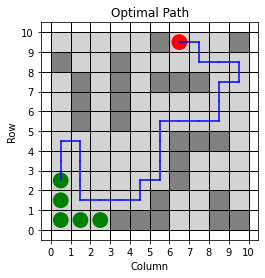

In [5]:
import matplotlib.pyplot as plt

def plot_grid(grid, blocked_cells, start_points, destination, optimal_path):
    rows = len(grid)
    cols = len(grid[0])

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()

    # Plot the grid cells and mark blocked cells
    for r in range(rows):
        for c in range(cols):
            if (r, c) in blocked_cells:
                ax.add_patch(plt.Rectangle((c, rows - 1 - r), 1, 1, facecolor='gray'))
            else:
                ax.add_patch(plt.Rectangle((c, rows - 1 - r), 1, 1, facecolor='lightgray'))

    # Mark the start points and the destination
    for point in start_points:
        ax.add_patch(plt.Circle((point[1] + 0.5, rows - 1 - point[0] + 0.5), 0.4, facecolor='green'))
    ax.add_patch(plt.Circle((destination[1] + 0.5, rows - 1 - destination[0] + 0.5), 0.4, facecolor='red'))

    # Plot the optimal path
    for i in range(len(optimal_path) - 1):
        y1, x1 = optimal_path[i]
        y2, x2 = optimal_path[i + 1]
        ax.plot([x1 + 0.5, x2 + 0.5], [rows - 1 - y1 + 0.5, rows - 1 - y2 + 0.5], 'b-')

    # Set axis labels and display the plot
    ax.set_xticks(range(cols + 1))
    ax.set_yticks(range(rows + 1))
    ax.set_xticklabels(range(cols + 1))
    ax.set_yticklabels(range(rows + 1))
    ax.set_aspect('equal')
    ax.grid(color='black', linestyle='-', linewidth=1)
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.title('Optimal Path')
    plt.show()

# Plot the grid with the optimal path
plot_grid(grid, blocked_cells, start_points, destination, optimal_path)


In [6]:
# Define different values to test for each hyperparameter
num_restarts_values = [50, 100, 200]
max_iterations_values = [50, 100, 200]
initial_temperature_values = [50.0, 100.0, 200.0]
cooling_rate_values = [0.95, 0.99, 0.999]

# Perform sensitivity analysis for num_restarts
for num_restarts in num_restarts_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, num_restarts)
    print(f"num_restarts={num_restarts} - Optimal Cost: {optimal_cost}")



num_restarts=50 - Optimal Cost: 4
num_restarts=100 - Optimal Cost: 4
num_restarts=200 - Optimal Cost: 4


In [7]:
num_restarts = 200

# Perform sensitivity analysis for max_iterations
for max_iterations in max_iterations_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells,num_restarts, max_iterations)
    print(f"max_iterations={max_iterations} - Optimal Cost: {optimal_cost}")



max_iterations=50 - Optimal Cost: 4
max_iterations=100 - Optimal Cost: 4
max_iterations=200 - Optimal Cost: 4


In [8]:
max_iterations = 200
num_restarts = 200
# Perform sensitivity analysis for initial_temperature
for initial_temperature in initial_temperature_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature)
    print(f"initial_temperature={initial_temperature} - Optimal Cost: {optimal_cost}")




initial_temperature=50.0 - Optimal Cost: 4
initial_temperature=100.0 - Optimal Cost: 4
initial_temperature=200.0 - Optimal Cost: 4


In [9]:
initial_temperature= 200
max_iterations = 200
num_restarts = 200
# Perform sensitivity analysis for cooling_rate
for cooling_rate in cooling_rate_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature, cooling_rate)
    print(f"cooling_rate={cooling_rate} - Optimal Cost: {optimal_cost}")

cooling_rate=0.95 - Optimal Cost: 4
cooling_rate=0.99 - Optimal Cost: 4
cooling_rate=0.999 - Optimal Cost: inf


In [10]:
num_restarts_values = [50, 100, 200]
max_iterations_values = [50, 100, 200]
initial_temperature_values = [50.0, 100.0, 200.0]
cooling_rate_values = [0.95, 0.99, 0.999]

In [ ]:
# Define different values to test for each hyperparameter
num_restarts_values = 200
max_iterations_values = 500
initial_temperature_values = 200
cooling_rate_values = 50
iteration=1
best_cost = 0 
# Perform sensitivity analysis for num_restarts
for num_restarts in range(10,num_restarts_values,10):
    if num_restarts < 10:
        continue
    for max_iterations in range(10,max_iterations_values,10):
        if max_iterations < 10:
            continue
        for initial_temperature in range(10,initial_temperature_values,10):
                if initial_temperature < 50:
                    continue
                for cooling_rate in range(1,cooling_rate_values,2):
                    if cooling_rate == 0:
                        continue
                    cooling = cooling_rate/50
                    if cooling_rate < 0.5:
                        continue
                    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature, cooling)
                    #print("****************Iteration",iteration)
                    #print(f"num_restarts={num_restarts} - Optimal Cost: {optimal_cost}")
                    #print(f"max_iterations={max_iterations} - Optimal Cost: {optimal_cost}")
                    #print(f"initial_temperature={initial_temperature} - Optimal Cost: {optimal_cost}")
                    #print(f"cooling_rate={cooling_rate} - Optimal Cost: {optimal_cost}")
                    iteration = iteration +1
                    if best_cost < optimal_cost:
                        cool = cooling
                        temp = initial_temperature
                        itera = max_iterations
                        num_rest =  num_restarts
                        best_cost = optimal_cost
    print(f"*******iteration={num_restarts}*************")
    print(f"num_restarts={num_rest} - Optimal Cost: {best_cost}")
    print(f"max_iterations={itera} - Optimal Cost: {best_cost}")
    print(f"initial_temperature={temp} - Optimal Cost: {best_cost}")
    print(f"cooling_rate={cool} - Optimal Cost: {best_cost}")

print(f"num_restarts={num_rest} - Optimal Cost: {best_cost}")
print(f"max_iterations={itera} - Optimal Cost: {best_cost}")
print(f"initial_temperature={temp} - Optimal Cost: {best_cost}")
print(f"cooling_rate={cool} - Optimal Cost: {best_cost}")


In [ ]:
# Perform sensitivity analysis for max_iterations
for max_iterations in max_iterations_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature, cooling_rate)
    print(f"max_iterations={max_iterations} - Optimal Cost: {optimal_cost}")

# Perform sensitivity analysis for initial_temperature
for initial_temperature in initial_temperature_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature, cooling_rate)
    print(f"initial_temperature={initial_temperature} - Optimal Cost: {optimal_cost}")

# Perform sensitivity analysis for cooling_rate
for cooling_rate in cooling_rate_values:
    optimal_path, optimal_cost = simulated_annealing(grid, start_points, destination, blocked_cells, max_iterations, initial_temperature, cooling_rate)
    print(f"cooling_rate={cooling_rate} - Optimal Cost: {optimal_cost}")
